### Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')

### Load the raw data

In [3]:
#raw_data = pd.read_csv(r"C:\Users\Buvi\Downloads\archive\1.04. Real-life example.csv")
#raw_data.head()
import pandas as pd
 
bucket='aws-glue-carsales'
data_key = 'target-data/output-csv/run-1701201992020-part-r-00000.csv'
data_location = 's3://{}/{}'.format(bucket,data_key )
 
raw_data = pd.read_csv(data_location)
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

#### Exploring the descriptive statistics of variables

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


From above, we can see that Model column is categorical variable and having 312 unique values, which implies, after converting it to dummy, it will add 312 new columns to the dataframe, so we will drop this column

#### Determining the variables of intereset

In [5]:
df = raw_data.drop('Model', axis=1)
# dropping Engine Version columan becasue we wont be using it and it has a lot of noisy data
df=df.drop(['EngineV'], axis = 1)

In [6]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'Engine Type', 'Registration',
       'Year'],
      dtype='object')

#### Dealing with missing values

In [7]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
df=df.fillna(df['Price'].mean(skipna=True))

In [9]:
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [10]:
# df.describe(include='all')

In [11]:
df[df['Mileage']==0].shape

(185, 7)

In [12]:
df.shape

(4345, 7)

In [13]:
df['Mileage']=df['Mileage'].mask(df.Mileage==0,df['Mileage'].mean(skipna=True))

In [14]:
df = df[df['Mileage']>50] 
df = df[df['Mileage']<400]

In [15]:
#check duplicate values
df.duplicated().sum()

77

In [16]:
df.drop_duplicates(keep='first',inplace=True)

In [17]:
df.shape

(3658, 7)

#### Distplot

<Axes: xlabel='Price', ylabel='Density'>

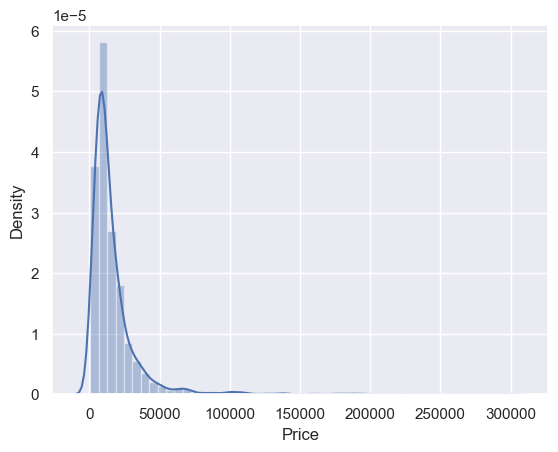

In [18]:
sns.distplot(df['Price'])

From above, we can say that Price column is not normally distributed, so we need to remove some outliers from data

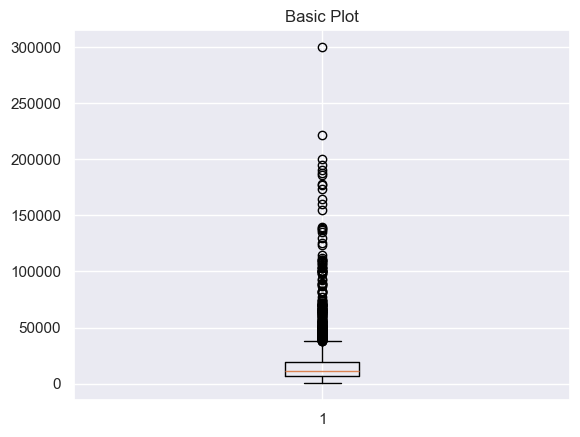

In [19]:
#boxplot
# data = df['Price']
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df['Price'])
plt.show()

In [20]:
q = df['Price'].quantile(0.99)
df = df[df['Price'] < q]

<Axes: xlabel='Price', ylabel='Density'>

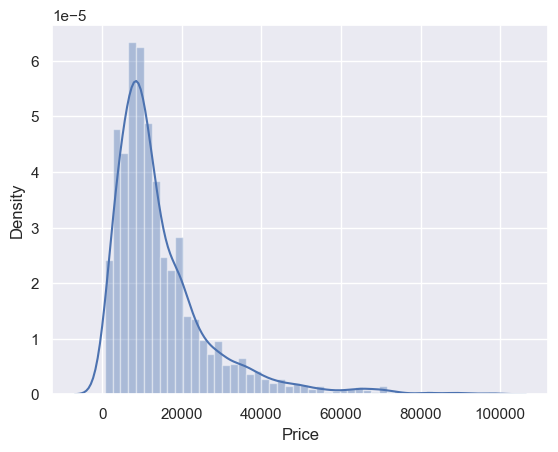

In [21]:
sns.distplot(df['Price'])

<Axes: xlabel='Mileage', ylabel='Density'>

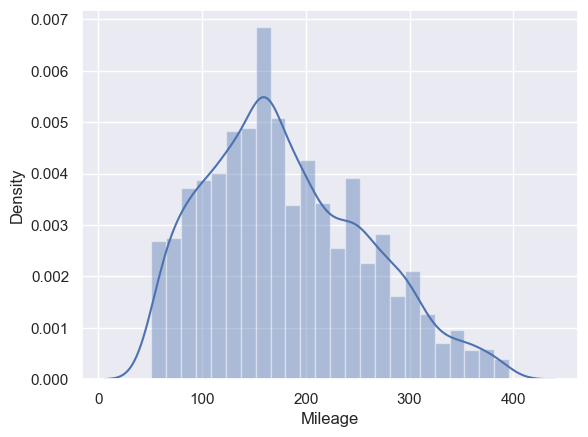

In [22]:
sns.distplot(df['Mileage'])

<Axes: xlabel='Year', ylabel='Density'>

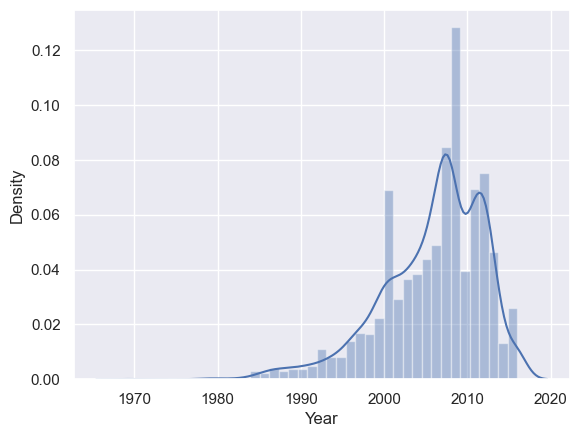

In [23]:
sns.distplot(df['Year'])

In [24]:
data_cleaned = df.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277.0,Petrol,yes,1991
1,Mercedes-Benz,13300.0,sedan,358.0,Gas,yes,2003
2,Audi,23000.0,crossover,240.0,Petrol,yes,2007
3,Toyota,18300.0,crossover,120.0,Petrol,yes,2011
4,Audi,14200.0,vagon,200.0,Diesel,yes,2006
...,...,...,...,...,...,...,...
3612,BMW,12090.0,hatch,145.0,Petrol,yes,2010
3613,Renault,2100.0,vagon,237.0,Diesel,no,2001
3614,Renault,6800.0,sedan,152.0,Petrol,yes,2007
3615,Volkswagen,11500.0,van,163.0,Diesel,yes,2008


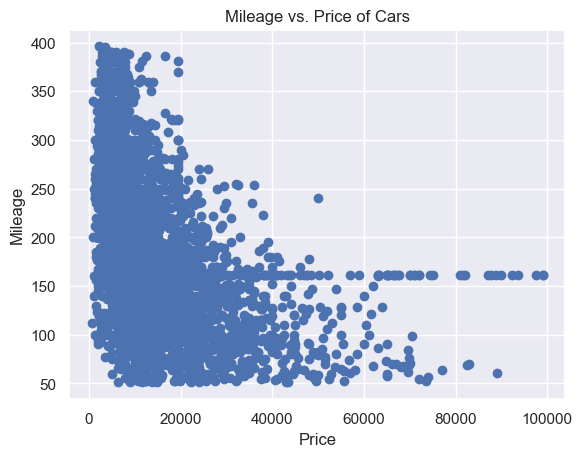

In [25]:
#you will notice that the price gets larger as the mileage gets smaller, and vice versa 
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('Mileage')
ax1.set_xlabel('Price')
ax1.set_title('Mileage vs. Price of Cars')
ax1.scatter(data_cleaned.Price, data_cleaned.Mileage)

### Checking the OLS assumptions

#### Linearity

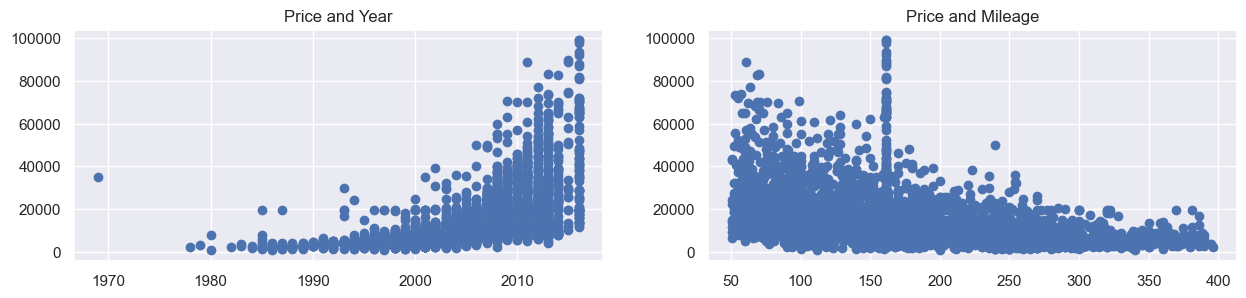

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title('Price and Mileage')

plt.show()

### From above plot, we can say that relationship is not linear in any of the case, so for now we cannot apply linear regression, first of all, we have to do some changes in the dataset

#### Relaxing the assumptions

In [27]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,Engine Type,Registration,Year,log_price
count,3617,3617.000000,3617,3617.000000,3617,3617,3617.000000,3617.000000
unique,7,NaN,6,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,Diesel,yes,NaN,NaN
freq,817,NaN,1404,NaN,1664,3243,NaN,NaN
mean,NaN,14785.940207,NaN,181.752520,NaN,NaN,2005.851258,9.294251
std,NaN,12876.672766,NaN,76.771093,NaN,NaN,6.146757,0.797642
min,NaN,600.000000,NaN,51.000000,NaN,NaN,1969.000000,6.396930
25%,NaN,6950.000000,NaN,124.000000,NaN,NaN,2002.000000,8.846497
50%,NaN,10900.000000,NaN,170.000000,NaN,NaN,2007.000000,9.296518
75%,NaN,18900.000000,NaN,236.000000,NaN,NaN,2011.000000,9.846917


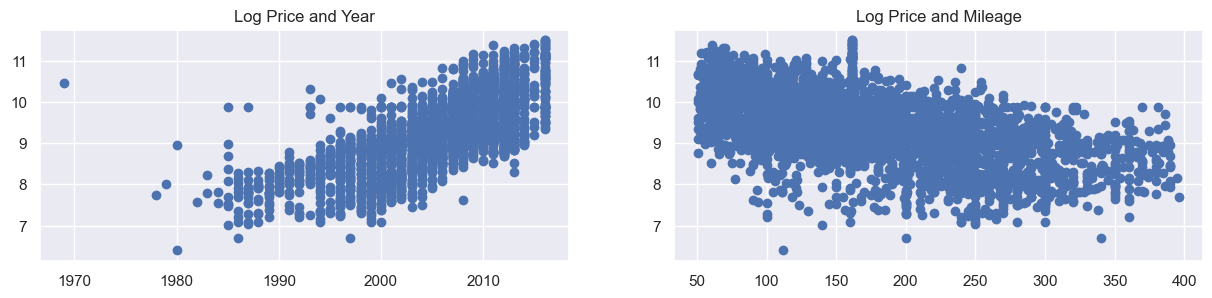

In [492]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title('Log Price and Mileage')

plt.show()

After transformation, we can say that we got linear patterns in almost all plots now

In [28]:
# Dropping Price column as we are using log transformed and normalised log_price as a target variable
data_cleaned = data_cleaned.drop(['Price'], axis=1)

#### Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
variables = data_cleaned[['Mileage', 'Year']]
vif = pd.DataFrame()

In [32]:
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [33]:
vif['Features'] = variables.columns

In [34]:
vif

,VIF,Features
0,6.544971,Mileage
1,6.544971,Year


### Create Dummy Variables

In [35]:
data_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [36]:
data_dummies = data_dummies.replace({True: 1, False: 0})

In [37]:
data_dummies.head()

,Mileage,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240.0,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200.0,2006,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [38]:
data_dummies.columns.values

array(['Mileage', 'Year', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [39]:
cols = ['log_price', 'Year', 'Mileage', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [40]:
data_preprocessed = data_dummies[cols]

In [41]:
variables = data_preprocessed
variables.head()

,log_price,Year,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,1991,277.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,9.495519,2003,358.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,2007,240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,2011,120.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,2006,200.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [42]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns.values
vif

,VIF,Features
0,421.894618,log_price
1,523.526546,Year
2,12.348001,Mileage
3,2.501735,Brand_BMW
4,2.952432,Brand_Mercedes-Benz
5,2.067224,Brand_Mitsubishi
6,2.712930,Brand_Renault
7,2.364606,Brand_Toyota
8,3.481532,Brand_Volkswagen
9,1.749543,Body_hatch


Obviously, 'log_price' has a very high VIF. This implies it is most definitely linearly correlated with all the other variables. And this is no surprise! We are using a linear regression to determine 'log_price' given values of the independent variables! This is exactly what we expect - a linear relationship!

However, to actually assess multicollinearity for the predictors, we have to drop 'log_price'. The multicollinearity assumption refers only to the idea that the independent variables shoud not be collinear.

In [43]:
# Since log_price has the highest VIF, removing it from the model
variables = data_preprocessed.drop(['Year', 'log_price'], axis=1)
variables.head()

,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [44]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns.values
vif

,VIF,Features
0,6.014073,Mileage
1,2.104190,Brand_BMW
2,2.556294,Brand_Mercedes-Benz
3,1.652721,Brand_Mitsubishi
4,2.152302,Brand_Renault
5,1.957284,Brand_Toyota
6,2.870844,Brand_Volkswagen
7,1.438044,Body_hatch
8,1.603786,Body_other
9,3.362163,Body_sedan


### Linear Regression Model

#### Declare the inputs and targets

In [45]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price','Year'], axis=1)

#### Scale the data

In [46]:
inputs

,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,145.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3613,237.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3614,152.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3615,163.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [47]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [48]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Linear Regression

In [50]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [51]:
reg.score(x_train, y_train)

0.64976468203483

### Testing

In [74]:
y_pred = reg.predict(x_test)

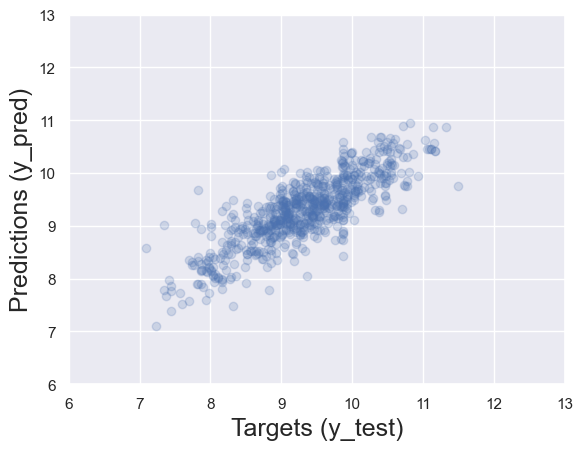

In [75]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_pred)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [54]:
df_pf = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
df_pf.head()

,Prediction
0,19729.304667
1,11585.890521
2,10730.253042
3,20502.256910
4,12936.561118


In [55]:
y_test = y_test.reset_index(drop=True)

In [56]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,19729.304667,17900.0
1,11585.890521,9999.0
2,10730.253042,13500.0
3,20502.256910,11900.0
4,12936.561118,19999.0


In [57]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Prediction']
df_pf.head()

,Prediction,Target,Residuals
0,19729.304667,17900.0,-1829.304667
1,11585.890521,9999.0,-1586.890521
2,10730.253042,13500.0,2769.746958
3,20502.256910,11900.0,-8602.256910
4,12936.561118,19999.0,7062.438882


In [58]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals'] / df_pf['Target'] * 100)
df_pf.sort_values(by=['Difference%'])
df_pf.head()

,Prediction,Target,Residuals,Difference%
0,19729.304667,17900.0,-1829.304667,10.219579
1,11585.890521,9999.0,-1586.890521,15.870492
2,10730.253042,13500.0,2769.746958,20.516644
3,20502.256910,11900.0,-8602.256910,72.287873
4,12936.561118,19999.0,7062.438882,35.313960


### Summary Statistics

In [59]:
# R2 Score
reg.score(x_train, y_train)

0.64976468203483

In [71]:
# MAE
metrics.mean_absolute_error(y_test,y_pred)

0.33949206405780863

In [72]:
# MSE
metrics.mean_squared_error(y_test,y_pred)

0.19049259412658806

In [63]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.4364545728098035

In [64]:
# intercept
reg.intercept_

9.28962737577065

In [65]:
reg.coef_

array([-0.36949033,  0.02667877,  0.02077254, -0.16470121, -0.22427467,
       -0.05088723, -0.11771943, -0.2232941 , -0.14707515, -0.29130316,
       -0.1911806 , -0.24871043, -0.12844467, -0.04149291, -0.14516656,
        0.31917347])

In [66]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_

In [67]:
reg_summary

,Features,Weights
0,Mileage,-0.369490
1,Brand_BMW,0.026679
2,Brand_Mercedes-Benz,0.020773
3,Brand_Mitsubishi,-0.164701
4,Brand_Renault,-0.224275
5,Brand_Toyota,-0.050887
6,Brand_Volkswagen,-0.117719
7,Body_hatch,-0.223294
8,Body_other,-0.147075
9,Body_sedan,-0.291303
